<a href="https://colab.research.google.com/github/Syed-Bilal-Hussaini/Task-9/blob/main/Task_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
data = pd.read_csv("/content/creditcard.csv")

In [11]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
print(data['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


In [13]:
fraud_pct = data['Class'].value_counts(normalize=True) * 100
print(f"Fraud Percentage: {fraud_pct[1]:.2f}%")

Fraud Percentage: 0.17%


In [14]:
X = data.drop(columns=['Class', 'Time'])
y = data['Class']

print(X.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0  0.098698  0.363787  0.090794  ...  0.251412 -0.018307  0.277838 -0.110474   
1  0.085102 -0.255425 -0.166974  ... -0.069083 -0.225775 -0.638672  0.101288   
2  0.247676 -1.514654  0.207643  ...  0.524980  0.247998  0.771679  0.909412   
3  0.377436 -1.387024 -0.054952  ... -0.208038 -0.108300  0.005274 -0.190321   
4 -0.270533  0.817739  0.753074  ...  0.408542 -0.009431  0.798278 -0.137458   

        V24       V25       V26       V27       V28  Amount  
0  0.0

In [15]:
from sklearn.model_selection import train_test_split

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training Fraud Ratio: {y_train.mean():.4f}")
print(f"Testing Fraud Ratio: {y_test.mean():.4f}")

Training Fraud Ratio: 0.0017
Testing Fraud Ratio: 0.0017


In [16]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [19]:
import xgboost as xgb
from sklearn.metrics import classification_report

# 1. Calculate the weight for the 'fraud' class
# Formula: number of negative cases / number of positive cases
ratio = (y_train == 0).sum() / (y_train == 1).sum()

# 2. Initialize the XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight=ratio, # This balances the fraud vs non-fraud importance
    use_label_encoder=False,
    eval_metric='logloss',
    n_jobs=-1
)

# 3. Train the model
print("Training XGBoost...")
xgb_model.fit(X_train, y_train)

# 4. Predict and Evaluate
print("Predicting...")
xgb_preds = xgb_model.predict(X_test)
print(classification_report(y_test, xgb_preds))

Training XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:35:02] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Predicting...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.72      0.85      0.78        98

    accuracy                           1.00     56962
   macro avg       0.86      0.92      0.89     56962
weighted avg       1.00      1.00      1.00     56962



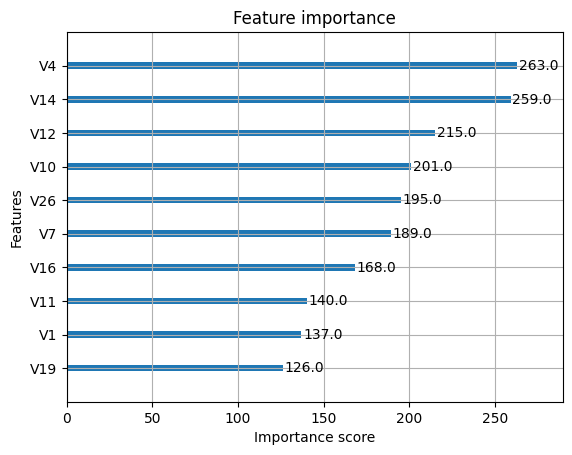

In [20]:
import matplotlib.pyplot as plt

# Use XGBoost's built-in importance plotter
xgb.plot_importance(xgb_model, max_num_features=10)
plt.rcParams['figure.figsize'] = [10, 6]
plt.show()

In [21]:
import joblib

# Save the model to a file
joblib.dump(rf_model, 'fraud_detector_rf.pkl')

# To load it later:
# loaded_model = joblib.load('fraud_detector_rf.pkl')

['fraud_detector_rf.pkl']